In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples

In [3]:
births = Table.read_table('baby.csv')
#The table contains 

#the baby's birth weight in ounces
# the number of gestational days, 
#the mother's age in completed years#
#the mother's height in inches,
#pregnancy weight in pounds
# and whether or not the mother smoked during pregnancy.


#The question we are looking at is the following:
#Does smoking have a effect on birth weight? 

#We will first compute the difference in average wights 
#between the smokers and the nonsmokers


In [4]:
# lets first get just the birthweigh and the smoker info
smoking_babies=births.select("Birth Weight","Maternal Smoker")
#lets save  this table to a variable and use group to find 
# how large each group is 
smoking_babies.group('Maternal Smoker')
# we have more maternal smokers 

#Lets now find the average weight of each group

smoking_babies.group('Maternal Smoker', np.average)
average_babies=smoking_babies.group('Maternal Smoker', np.average)

#The observed statistic we will be lookin at is given by
# the difference of the smokers by the nonsmokers

observed_statistic = 113.819-123.085
observed_statistic


#Question:  What values of our statistic are in 
#favor of the alternative: positive or negative?

#the statistic is a negative value since a negatice number
#means the non smoker babies are heavier on average in this data so far

-9.265999999999991

In [5]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [6]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


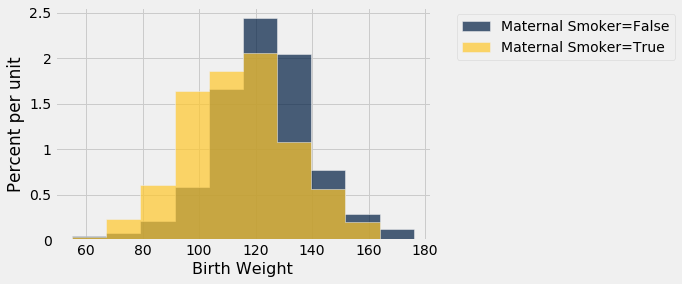

In [7]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

# Test Statistic

[Question] What values of our statistic are in favor of the alternative: positive or negative?

In [8]:
average_babies

#notice we hard coded the observed statistic
#we want to repeat this logic so we will rewrite it as 
# a function

#lets walk thourhg anoother way of computing the 
#test statistic

averageshold=average_babies.column("Birth Weight average")
#now we wnat the difference of smokers - nonsmokers 
observed_stat=averageshold.item(1)-averageshold.item(0)


#Select birth weight and smoking maternal
#Find averages of groups - needed a table
#Got column of averages - used .column
#found difference - 

def difference_of_averages(inputT):
    BM=inputT.select("Birth Weight","Maternal Smoker")
    average_table=BM.group("Maternal Smoker",np.average)
    means = average_table.column("Birth Weight average")
    return means.item(1)-means.item(0)

#Computes differences of average birth weight between smokers
#and nonsmokers
difference_of_averages(births)

-9.266142572024918

In [9]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

NameError: name 'means_table' is not defined

In [ ]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [ ]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

# Random Permutation (Shuffling)

In [10]:
#We want to see then if the observed statistic due to chance?
#i. is the p-value of -9.26 small or large?  

#to do so we assume that smoking has no real effect!

#To set up our experiment we will use permutation

#Again if smoking vs nonsmoking does not effect weight then
#we would expect the average birth weights to be close

#avergesmokerwight - avergenonsmokerwight about 0


#lets reiew sample

letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [22]:
# sample randomly chooses with replacement
letters.sample()
#if there is no sample size it just shuffules the entire sample

#there is an optional argument where we can sample without replacement
letters.sample(with_replacement = False) #permutes all elements
#this makes sure we do not draw the same item twice

#so if we would like to 'permuate an attribute' we can use sample without replacement

permutated_letters=letters.sample(with_replacement = False).column(0)
letters.with_column('Permutated',permutated_letters)

Letter,Permutated
a,d
b,b
c,a
d,e
e,c


In [13]:
letters.sample(with_replacement = False)

Letter
d
e
c
b
a


In [14]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

Letter,Shuffled
a,d
b,c
c,e
d,a
e,b


# Simulation Under Null Hypothesis

In [53]:
smoking_babies
#Shuffle all group labels
#Assign each shuffled label to a birth weight
#Find the difference between the averages of the two  shuffled groups
#Repeat
permutated_smoking_attribute=smoking_babies.select("Maternal Smoker").sample(with_replacement =False).column(0)

smoking_babies.with_columns('Permutated Maternal Smoker',permutated_smoking_attribute)
#lets make this table to use our janky funciton
permutated=smoking_babies.select("Birth Weight").with_columns('Maternal Smoker',permutated_smoking_attribute)
#still permutated labels

#use our jank function
difference_of_averages(permutated)
# Very close to zero in comparions to -9

#Now we will run simulation

#Make function to simulates the expierment
def permutate_and_average():
    #permutate thelables and save
    perm=smoking_babies.select("Maternal Smoker").sample(with_replacement =False).column(0)
    #make table with weights and permutated labels then save
    permutated_table=smoking_babies.select("Birth Weight").with_columns('Maternal Smoker',perm)
    #place our table into our function to compute average and return result
    return difference_of_averages(permutated_table)

permutate_and_average()
#use for loop to rerurn 1000 and record results

#make array to save data
hold = make_array()

for i in np.arange(1000):
    new_average=permutate_and_average()
    hold = np.append(hold,new_average)



In [55]:
averages=Table().with_column('Averages',hold)

0

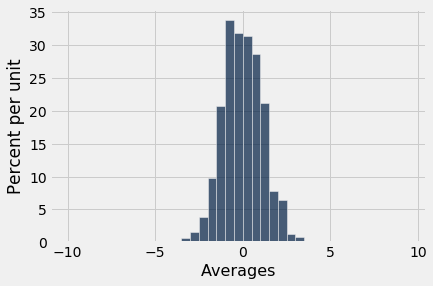

In [59]:
averages.hist(bins=np.arange(-10,10,.5))
#most of the averages are between -4 and 4 pounds
#it seems like our ouserved statistic is not random
#since our simulated values are far away!

#lets try to compute the p-value

np.count_nonzero(hold<=difference_of_averages(births))
#The p-value is zero!!
#Since there are no simulated averages that are less then -9.16
#There for the p-value is extermely low and smoking does have an effect!

In [18]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,True
False,113,False
True,128,False
True,108,False
False,136,True
False,138,True
False,132,True
False,120,False
True,143,True
False,140,True


In [19]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

-1.4784679372914553

In [20]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

# Permutation Test

In [21]:
#Now we will run simulation

#Make function to simulates the expierment


#use for loop to rerurn 1000 and record results

In [22]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

-0.823831070889895

In [23]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference: -9.266142572024918


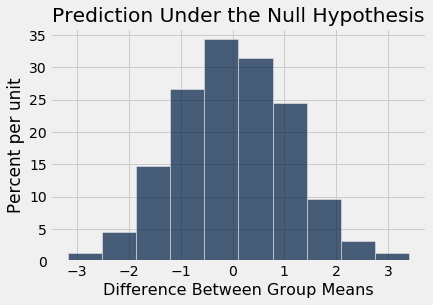

In [24]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');